In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

names1880 = pd.read_csv("babynames/yob1880.txt",
                        names=['name','sex','births'])
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [2]:
names1880.shape

(2000, 3)

In [3]:
names1880.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
name      2000 non-null object
sex       2000 non-null object
births    2000 non-null int64
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [4]:
years = range(1880, 2011)
pieces = []
for year in years:
    path = "babynames/yob{}.txt".format(year)
    frame = pd.read_csv(path, names=['name','sex','births'])
    frame['year'] = year
    pieces.append(frame)
names = pd.concat(pieces, ignore_index=True)
names.shape

(1690784, 4)

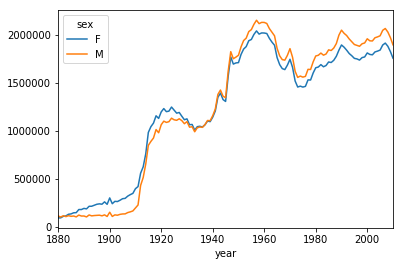

In [5]:
total_births = names.pivot_table('births', index='year',
                                columns='sex', aggfunc=sum)
total_births.plot()

In [6]:
total_births.head()
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


In [7]:
names.tail()

,name,sex,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [8]:
names.groupby(['year','sex'])['births'].sum().head(10)

year  sex
1880  F       90993
      M      110493
1881  F       91955
      M      100748
1882  F      107851
      M      113687
1883  F      112322
      M      104632
1884  F      129021
      M      114445
Name: births, dtype: int64

In [9]:
def add_prop(group): # dataframe을 받아서 col을 하나 더 만들어서 리턴해주는 함수
    group['prop'] = group.births / group.births.sum()
    return group

add_prop(names).head(10)

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.000022
1,Anna,F,2604,1880,0.000008
2,Emma,F,2003,1880,0.000006
3,Elizabeth,F,1939,1880,0.000006
4,Minnie,F,1746,1880,0.000005
5,Margaret,F,1578,1880,0.000005
6,Ida,F,1472,1880,0.000005
7,Alice,F,1414,1880,0.000004
8,Bertha,F,1320,1880,0.000004
9,Sarah,F,1288,1880,0.000004


In [10]:
names = names.groupby(['year', 'sex']).apply(add_prop)
# 여기에서의 작동방식이 어떻게 되는거지?
print(names)

              name sex  births  year      prop
0             Mary   F    7065  1880  0.077643
1             Anna   F    2604  1880  0.028618
2             Emma   F    2003  1880  0.022013
3        Elizabeth   F    1939  1880  0.021309
4           Minnie   F    1746  1880  0.019188
5         Margaret   F    1578  1880  0.017342
6              Ida   F    1472  1880  0.016177
7            Alice   F    1414  1880  0.015540
8           Bertha   F    1320  1880  0.014507
9            Sarah   F    1288  1880  0.014155
10           Annie   F    1258  1880  0.013825
11           Clara   F    1226  1880  0.013474
12            Ella   F    1156  1880  0.012704
13        Florence   F    1063  1880  0.011682
14            Cora   F    1045  1880  0.011484
15          Martha   F    1040  1880  0.011429
16           Laura   F    1012  1880  0.011122
17          Nellie   F     995  1880  0.010935
18           Grace   F     982  1880  0.010792
19          Carrie   F     949  1880  0.010429
20           

In [11]:
names.sort_values(by='births',ascending=False)[:1000]

,name,sex,births,year,prop
431022,Linda,F,99651,1947,0.056229
441381,Linda,F,96185,1948,0.056657
437125,James,M,94601,1947,0.051768
544528,Michael,M,92700,1957,0.043008
437126,Robert,M,91557,1947,0.050102
451624,Linda,F,90952,1949,0.053201
533062,Michael,M,90587,1956,0.042870
556106,Michael,M,90468,1958,0.042673
447426,James,M,88542,1948,0.050495
510710,Michael,M,88462,1954,0.043429


In [15]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
# birth기준 상위 1000개 이름 구해주는 함수

# get_top1000(names)
# 이렇게 하면 1000개 오름차순으로 그냥 그거 나옴

각 그룹별(나이, 성별로 나눠진)로 1000개 모은 것 => top1000
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)
top1000.index = np.arange(len(top1000))
top1000.index

,name,sex,births,year,prop
431022,Linda,F,99651,1947,0.056229
441381,Linda,F,96185,1948,0.056657
437125,James,M,94601,1947,0.051768
544528,Michael,M,92700,1957,0.043008
437126,Robert,M,91557,1947,0.050102
451624,Linda,F,90952,1949,0.053201
533062,Michael,M,90587,1956,0.042870
556106,Michael,M,90468,1958,0.042673
447426,James,M,88542,1948,0.050495
510710,Michael,M,88462,1954,0.043429


In [13]:
type(grouped.groups) # 요걸로 확인 가능!
# https://pandas.pydata.org/pandas-docs/stable/search.html?q=groupby
# 위 페이지에서 그룹별 확인할 수 있는 것들 많음

dict

In [17]:
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [18]:
boys = top1000[top1000.sex=="M"]
girls = top1000[top1000.sex=="F"]

In [19]:
total_births = top1000.pivot_table('births', index='year',\
                                   columns='name', aggfunc=sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [20]:
total_births.head()
# NaN이 많구만

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000237E2728BA8>,
      dtype=object)

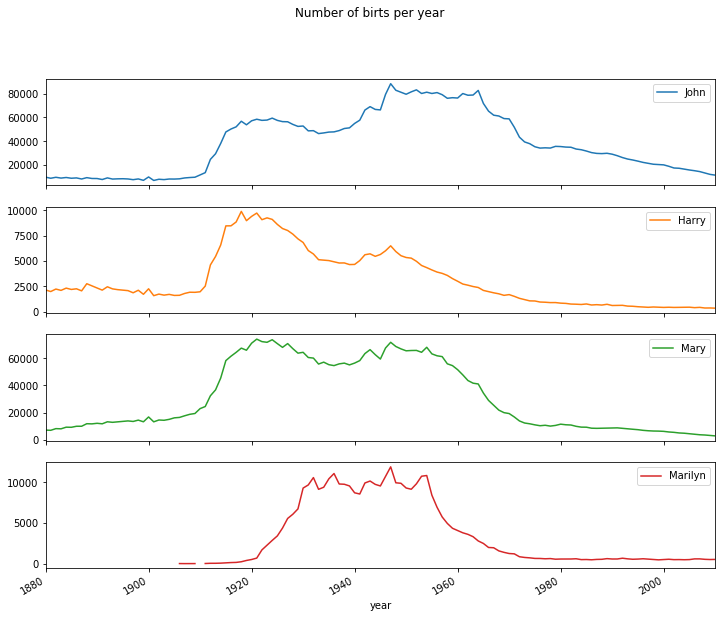

In [21]:
sub_set = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
sub_set.plot(subplots=True, figsize=(12,10), title="Number of birts per year")

In [22]:
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)
table.shape

(131, 2)

In [23]:
table.head()

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539


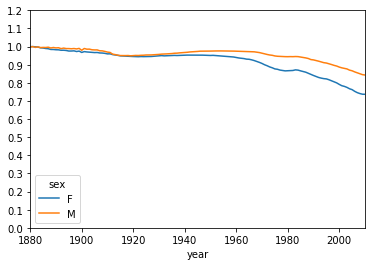

In [24]:
table.plot(xticks=range(1880,2010,20),yticks=np.linspace(0,1.2,13))

In [25]:
df = boys[boys.year==2010]
df.head()

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887


In [26]:
df.sort_values(by='prop', ascending=False)['prop']

260877    0.011523
260878    0.009411
260879    0.009025
260880    0.008971
260881    0.008887
260882    0.008762
260883    0.008576
260884    0.008259
260885    0.008114
260886    0.008093
260887    0.008027
260888    0.007758
260889    0.007446
260890    0.007424
260891    0.007397
260892    0.007350
260893    0.007345
260894    0.007235
260895    0.007224
260896    0.007194
260897    0.006701
260898    0.006469
260899    0.006261
260900    0.006203
260901    0.006159
260902    0.006018
260903    0.005936
260904    0.005809
260905    0.005776
260906    0.005716
            ...   
261850    0.000106
261846    0.000106
261848    0.000106
261847    0.000106
261851    0.000105
261852    0.000105
261853    0.000105
261854    0.000105
261855    0.000105
261856    0.000105
261857    0.000104
261858    0.000104
261862    0.000104
261864    0.000104
261863    0.000104
261861    0.000104
261860    0.000104
261859    0.000104
261865    0.000103
261866    0.000103
261867    0.000103
261868    0.

In [27]:
prop_cumsum = df.sort_values(by='prop', ascending=False)['prop'].cumsum()
# 2010 남자의 prop을 잡아서 높은것부터 차근차근 쌓아가기!
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [28]:
prop_cumsum.shape

(1000,)

In [29]:
prop_cumsum.values.searchsorted(0.5)
# 정렬된 놈들 중에서 값이 0.5가 되는 위치? : 116번째까지만 합쳐도 0.5 되네!

116

In [30]:
prop_cumsum.values[116] # series를 ndarray로 바꿔주고~!

0.5006516075268308

In [31]:
names[names.year==2010].shape

(33838, 5)

In [32]:
df = boys[boys.year==1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5)+1 # 정렬된 상태에서 0.5 되는 위치 +1

25

In [33]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q)

diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity # 0.5되기까기 몇 개의 다양한 이름들이 있는거니?

year  sex
1880  F       37
      M       13
1881  F       37
      M       13
1882  F       37
      M       14
1883  F       38
      M       14
1884  F       38
      M       15
1885  F       39
      M       15
1886  F       40
      M       15
1887  F       40
      M       16
1888  F       41
      M       16
1889  F       42
      M       17
1890  F       43
      M       18
1891  F       43
      M       19
1892  F       43
      M       19
1893  F       43
      M       20
1894  F       44
      M       21
            ... 
1996  F      121
      M       63
1997  F      128
      M       66
1998  F      137
      M       69
1999  F      145
      M       72
2000  F      154
      M       76
2001  F      163
      M       80
2002  F      169
      M       82
2003  F      177
      M       86
2004  F      190
      M       91
2005  F      198
      M       95
2006  F      208
      M       98
2007  F      222
      M      102
2008  F      233
      M      108
2009  F      240
    

In [34]:
diversity = diversity.unstack('sex')
diversity.head(30)

sex,F,M
year,,
1880,37,13
1881,37,13
1882,37,14
1883,38,14
1884,38,15
1885,39,15
1886,40,15
1887,40,16
1888,41,16


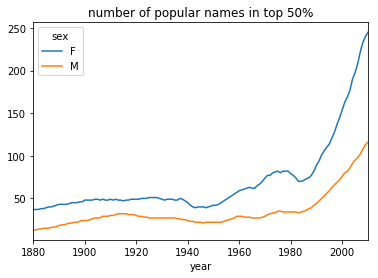

In [35]:
diversity.plot(title='number of popular names in top 50%')

In [36]:
names.head(10)

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [48]:
get_last_letter = lambda x: x[-1] # 마지막 글자 찾는 함수
last_letters = names.name.map(get_last_letter) # 그놈들의 last letters
last_letters.name = 'last_letter'
last_letters.head()

0    y
1    a
2    a
3    h
4    e
Name: last_letter, dtype: object

In [43]:
last_letters.count()

1690784

In [49]:
pd.DataFrame(last_letters).groupby('last_letter').size()
# 아하 이런식으로 구할 수 있구나!

last_letter
a    447665
b      3670
c      5800
d     43318
e    316233
f      3174
g      6815
h     55887
i     61302
j      1357
k     15203
l     95562
m     16044
n    263569
o     62407
p      2300
q       524
r     53237
s     71324
t     31830
u      4681
v      1487
w      2877
x      2767
y    115729
z      6022
dtype: int64

In [54]:
from string import ascii_lowercase
alpha_list = list(ascii_lowercase)
alpha_list

anslist = pd.Series([0]*26, index=alpha_list)
anslist + pd.DataFrame(last_letters).groupby('last_letter').size()

#요런식으로 더해줄 수 있네

a    447665
b      3670
c      5800
d     43318
e    316233
f      3174
g      6815
h     55887
i     61302
j      1357
k     15203
l     95562
m     16044
n    263569
o     62407
p      2300
q       524
r     53237
s     71324
t     31830
u      4681
v      1487
w      2877
x      2767
y    115729
z      6022
dtype: int64

In [86]:
table = names.pivot_table('births', index=last_letters,
                         columns=['sex','year'], aggfunc=sum)
table
# 성별, 연도에 따른 last letter 사용수 table!

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
f                NaN      NaN      NaN  ...    1758.0    1817.0    1819.0   
g               25.0     44.0     28.0  ...    2151.0    2084.0    2009.0   
h             7141.0   8630.0   8826.0  ...   85959.0   88085.0   88226.0   
i              105.0    141.0    134.0  ...   20980.0   23610.0   26011.0   
j                NaN      NaN      NaN  ...    1069.0    1088.0    1203.0   
k               19.0     21.0     22.0  ...   42477.0   42043.0   42296.0   
l             6175.0   7900.0   8395.0  ...  153648.0  153493.0  153862.0   
m               90.0    123.0    137.0  ...   41967.0   42663.0   42790.0   
n             5512.0   6833.0   7103.0  ...  616099.0  630322.0  663419.0   
o               97.0    134.0    142.0  ...   82146.0   83180.0   85423.0   
p                NaN      NaN      NaN  ...    3419.0    3157.0    2982.0   
q                NaN      NaN      NaN  ...     602.0     618.0     585.0   
r              910.0   1207.0   1214.0  ...  165377.0  164821.0  169878.0   
s             2803.0   3582.0   3569.0  ...  143791.0  139595.0  138632.0   
t             3140.0   3816.0   3784.0  ...

In [87]:
subtable = table.reindex(columns=[1880,1910,1960,2010], level='year')
subtable.head()
# 원하는 인덱스만 빼오기!

sex                F                                      M           \
year            1880      1910      1960      2010     1880     1910   
last_letter                                                            
a            31446.0  108376.0  691247.0  670605.0    776.0    977.0   
b                NaN       NaN     694.0     450.0    509.0    411.0   
c                NaN       5.0      49.0     946.0    349.0    482.0   
d              609.0    6750.0    3729.0    2607.0   9177.0  22111.0   
e            33378.0  133569.0  435013.0  313833.0  13493.0  28655.0   

sex                              
year             1960      2010  
last_letter                      
a              5204.0   28438.0  
b              3912.0   38859.0  
c             15476.0   23125.0  
d            262112.0   44398.0  
e            178823.0  129012.0

In [88]:
subtable.sum()

sex  year
F    1880      90993.0
     1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1880     110493.0
     1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [89]:
letter_prop = subtable/(subtable.sum()) 
# sum()함수 자체가 col별로 되어있으므로 col별 prop이 나올 것
letter_prop

sex                 F                                       M            \
year             1880      1910      1960      2010      1880      1910   
last_letter                                                               
a            0.345587  0.273390  0.341853  0.381240  0.007023  0.005031   
b                 NaN       NaN  0.000343  0.000256  0.004607  0.002116   
c                 NaN  0.000013  0.000024  0.000538  0.003159  0.002482   
d            0.006693  0.017028  0.001844  0.001482  0.083055  0.113858   
e            0.366819  0.336941  0.215133  0.178415  0.122116  0.147556   
f                 NaN       NaN  0.000010  0.000055  0.000977  0.000783   
g            0.000077  0.000144  0.000157  0.000374  0.001330  0.002250   
h            0.053444  0.051529  0.036224  0.075852  0.036645  0.045562   
i            0.000670  0.001526  0.039965  0.031734  0.001810  0.000844   
j                 NaN       NaN       NaN  0.000090       NaN       NaN   
k            0.000143  0.000121  0.000156  0.000356  0.042718  0.036581   
l            0.027925  0.043189  0.033867  0.026356  0.046066  0.065016   
m            0.000637  0.001201  0.008613  0.002588  0.101907  0.058044   
n            0.033057  0.079240  0.130687  0.140210  0.153213  0.143415   
o            0.000330  0.001660  0.002439  0.001243  0.008444  0.017065   
p                 NaN  0.000018  0.000023  0.000020  0.002552  0.003172   
q                 NaN       NaN       NaN  0.000030       NaN       NaN   
r            0.005286  0.013390  0.006764  0.018025  0.067461  0.064481   
s            0.015287  0.039042  0.012764  0.013332  0.167006  0.130815   
t            0.023650  0.027438  0.015201  0.007830  0.062891  0.072879   
u            0.004176  0.000684  0.000574  0.000417  0.000226  0.000124   
v                 NaN       NaN  0.000060  0.000117  0.000299  0.000113   
w                 NaN  0.000020  0.000031  0.001182  0.007720  0.006329   
x                 NaN  0.000015  0.000037  0.000727  0.002751  0.003965   
y            0.115053  0.110972  0.152569  0.116828  0.075760  0.077349   
z            0.001165  0.002439  0.000659  0.000704  0.000262  0.000170   

sex                              
year             1960      2010  
last_letter                      
a            0.002440  0.014980  
b            0.001834  0.020470  
c            0.007257  0.012181  
d            0.122908  0.023387  
e            0.083853  0.067959  
f            0.004325  0.001188  
g            0.009488  0.001404  
h            0.037907  0.051670  
i            0.000603  0.022628  
j                 NaN  0.000769  
k            0.049384  0.018541  
l            0.104904  0.070367  
m            0.033827  0.024657  
n            0.152522  0.362771  
o            0.012829  0.042681  
p            0.005675  0.001269  
q                 NaN  0.000180  
r            0.031034  0.087477  
s            0.102730  0.065145  
t            0.065655  0.022861  
u            0.000057  0.001221  
v            0.000037  0.001434  
w            0.007711  0.016148  
x            0.001851  0.008614  
y            0.160987  0.058168  
z            0.000184  0.001831

In [113]:
# 요건 가로축으로 계산하기
tmp = subtable.values/subtable.apply(np.sum, axis=1).values.reshape(26,-1)
(tmp).shape
# 이렇게 array로 구하면 의미가 있는가...?

(26, 8)

In [115]:
pd.DataFrame(data=tmp, index=letter_prop.index,columns=letter_prop.columns).head()
# 요런식으로 하면 가로로도 할 수 있다! : 만약 numpy array로 가서 작업헀다면,
# index와 column 변수는 원 df에서 가져다쓰면 간단히 다시 만들 수 있다!

sex                 F                                       M            \
year             1880      1910      1960      2010      1880      1910   
last_letter                                                               
a            0.020458  0.070508  0.449718  0.436288  0.000505  0.000636   
b                 NaN       NaN  0.015479  0.010037  0.011353  0.009167   
c                 NaN  0.000124  0.001212  0.023397  0.008632  0.011921   
d            0.001733  0.019204  0.010609  0.007417  0.026109  0.062906   
e            0.026370  0.105523  0.343673  0.247937  0.010660  0.022638   

sex                              
year             1960      2010  
last_letter                      
a            0.003386  0.018501  
b            0.087253  0.866711  
c            0.382766  0.571948  
d            0.745710  0.126313  
e            0.141275  0.101923

In [122]:
# letter_prop['F']

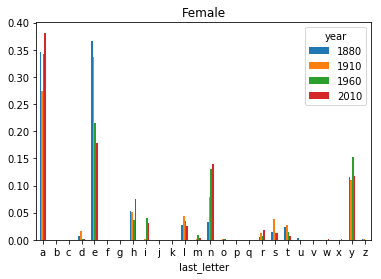

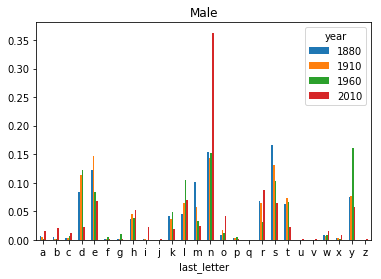

In [117]:
letter_prop['F'].plot(kind='bar', rot=0, title='Female')
letter_prop['M'].plot(kind='bar', rot=0, title='Male')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


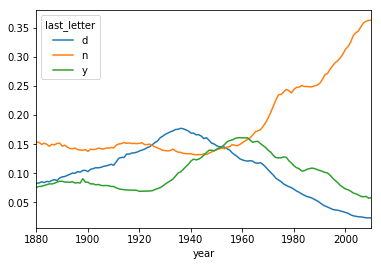

In [123]:
# d / n / y로 끝나는 이름을 가진 남자아이의 출생 비율
letter_prop = table/table.sum()
dny_ts = letter_prop['M'].ix[['d','n','y']].T
dny_ts.plot()

In [125]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


In [127]:
dny_tsf = letter_prop['F'].ix[['d','n','y']].T
dny_tsf.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


last_letter,d,n,y
year,,,
1880,0.006693,0.033057,0.115053
1881,0.006601,0.032179,0.113142
1882,0.006806,0.033157,0.112609
1883,0.007211,0.034161,0.107397
1884,0.007100,0.034932,0.107866


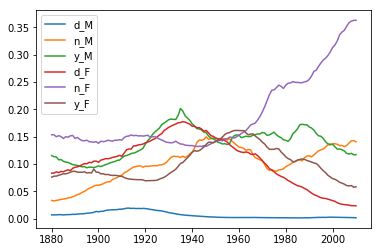

In [137]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(dny_tsf)
ax.plot(dny_ts)
ax.legend(['d_M','n_M','y_M','d_F','n_F','y_F'])
# legend는 어떻게 붙이나?

In [140]:
# merge 해서 한꺼번에 보자!

unames = ['user_id','gender','age','occupation','zip']
rnames = ['user_id','movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

In [141]:
users=pd.read_csv("data_0705/movielens/users.dat",
                  names=unames,header=None,sep="::")
ratings=pd.read_csv("data_0705/movielens/ratings.dat",
                    names=rnames,header=None,sep="::")
movies=pd.read_csv("data_0705/movielens/movies.dat",
                   names=mnames,header=None,sep="::")

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [142]:
users.shape

(6040, 5)

In [143]:
ratings.shape

(1000209, 4)

In [146]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [147]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [148]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [151]:
pd.merge(ratings, users).shape # user_id 기준으로 합친듯?

(1000209, 8)

In [149]:
# 연도, 제목을 추출하는 정규표현식 작성 => year, title 컬럼 생성
# 장르 => 원핫인코딩으로
data = pd.merge(pd.merge(ratings, users), movies) # user_id / movie_id 기준으로 merge!
data.ix[0]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
user_id       1000209 non-null int64
movie_id      1000209 non-null int64
rating        1000209 non-null int64
timestamp     1000209 non-null int64
gender        1000209 non-null object
age           1000209 non-null int64
occupation    1000209 non-null int64
zip           1000209 non-null object
title         1000209 non-null object
genres        1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [153]:
mean_ratings = data.pivot_table('rating', index='title',
                               columns='gender', aggfunc='mean')
mean_ratings.head() # 타이틀 / 성별으로 본 rating의 평균

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [154]:
mean_ratings.shape

(3706, 2)

In [156]:
ratings_by_title = data.groupby('title').size() # 그룹별 사이즈!
# 그러면 이거는 영화별 쓰여진 댓글 개수로 봐도 될까?
ratings_by_title

title
$1,000,000 Duck (1971)                              37
'Night Mother (1986)                                70
'Til There Was You (1997)                           52
'burbs, The (1989)                                 303
...And Justice for All (1979)                      199
1-900 (1994)                                         2
10 Things I Hate About You (1999)                  700
101 Dalmatians (1961)                              565
101 Dalmatians (1996)                              364
12 Angry Men (1957)                                616
13th Warrior, The (1999)                           750
187 (1997)                                          55
2 Days in the Valley (1996)                        286
20 Dates (1998)                                    139
20,000 Leagues Under the Sea (1954)                575
200 Cigarettes (1999)                              181
2001: A Space Odyssey (1968)                      1716
2010 (1984)                                        470
24 7

In [158]:
ratings_by_title['X-Men (2000)']

1511

In [159]:
ratings_by_title[ratings_by_title>=250]

title
'burbs, The (1989)                                                     303
10 Things I Hate About You (1999)                                      700
101 Dalmatians (1961)                                                  565
101 Dalmatians (1996)                                                  364
12 Angry Men (1957)                                                    616
13th Warrior, The (1999)                                               750
2 Days in the Valley (1996)                                            286
20,000 Leagues Under the Sea (1954)                                    575
2001: A Space Odyssey (1968)                                          1716
2010 (1984)                                                            470
28 Days (2000)                                                         505
39 Steps, The (1935)                                                   253
54 (1998)                                                              259
7th Voyage of Sinba

In [163]:
active_titles = ratings_by_title.index[ratings_by_title>=250] # 이거는 그냥 numpy 문법이라고 생각하면 될듯!
active_titles # 250건 이상의 rating이 있었던 영화들의 index!

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [165]:
len(active_titles)

1216

In [167]:
mean_ratings.loc[active_titles]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [173]:
mean_ratings.ix[active_titles].sort_values(by=['F','M'],ascending=False) # 원하는 title 뽑아보기!

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [175]:
mean_ratings.ix[active_titles].sort_values(by='title',ascending=True)
# 오! 알파벳 순서로도 정렬할 수 있다!

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [184]:
ratings_by_title.values[ratings_by_title>=250]

array([303, 700, 565, ..., 379, 301, 410], dtype=int64)

In [185]:
mean_ratings = mean_ratings.ix[active_titles] # 귀찮아서 걍 1000개만 보려구!

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [193]:
# 내가 궁금한것 ?
# 어떤 성별일 때 평점을 많이 줬는지?
mean_ratings['diff'] = np.abs(mean_ratings['M'] - mean_ratings['F']) # 평점차이 컬럼 생성
# 절댓값
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff.head()

gender,F,M,diff
title,,,
Tender Mercies (1983),3.905405,3.905263,0.000142
"Mystery, Alaska (1999)",3.434783,3.435780,0.000997
Jerry Maguire (1996),3.758315,3.759424,0.001109
Trainspotting (1996),3.958974,3.960432,0.001457
Robin Hood: Prince of Thieves (1991),3.161290,3.163347,0.002056


In [194]:
sorted_by_diff[::] # 전체 다나오긔

gender,F,M,diff
title,,,
Tender Mercies (1983),3.905405,3.905263,0.000142
"Mystery, Alaska (1999)",3.434783,3.435780,0.000997
Jerry Maguire (1996),3.758315,3.759424,0.001109
Trainspotting (1996),3.958974,3.960432,0.001457
Robin Hood: Prince of Thieves (1991),3.161290,3.163347,0.002056
Dune (1984),3.354331,3.356495,0.002165
Fatal Attraction (1987),3.668050,3.670232,0.002182
Miracle on 34th Street (1947),3.959016,3.961240,0.002224
Indiana Jones and the Temple of Doom (1984),3.674312,3.676568,0.002256


In [195]:
sorted_by_diff[::-1] # 이렇게 하면 뒤에서부터 거꾸로!

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,0.830782
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
Grease (1978),3.975265,3.367041,0.608224


In [197]:
sorted_by_diff[::-1][0:5] 
# 아까 만들때 ascending=True로 줬을 때, 맨 뒤에거(평점차이가 가장 큰 영화)를 가져오는 방법

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,0.830782
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608


In [208]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Gate of Heavenly Peace, The (1995)           5.0
Lured (1947)                                 5.0
Ulysses (Ulisse) (1954)                      5.0
Smashing Time (1967)                         5.0
Follow the Bitch (1998)                      5.0
Song of Freedom (1936)                       5.0
Bittersweet Motel (2000)                     5.0
Baby, The (1973)                             5.0
One Little Indian (1973)                     5.0
Schlafes Bruder (Brother of Sleep) (1995)    5.0
Name: rating, dtype: float64

In [213]:
data.groupby('title')['rating'].std().head()

title
$1,000,000 Duck (1971)           1.092563
'Night Mother (1986)             1.118636
'Til There Was You (1997)        1.020159
'burbs, The (1989)               1.107760
...And Justice for All (1979)    0.878110
Name: rating, dtype: float64

In [215]:
# json file을 읽어봅시다
import json
with open("data_0705/bitly_usagov/example.txt", 'r') as fr:
    print(fr.readline())
# 뭐 이런식으로도 할 수 있다
# 근데 이건 "문자열을 가져온 것이고"

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [218]:
# 보통 list comprehension으로 읽어들인다 : list 포함 문법! for문을 list 안에서 돌린당
records = [json.loads(line) for line in open("data_0705/bitly_usagov/example.txt", 'r',\
                                   encoding='utf-8')]
# 이렇게 하면 dictionary 형식으로 가져온 것!

In [225]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [227]:
'tz' in records[0] # 아 이런식으로 dictionary key가 있냐? 물어보는걸로 알 수 있음

True

In [221]:
records[0]['a'] # 이런식으로의 접근도 가능하다!

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11'

In [230]:
# dataframe으로 만들고 싶다!
# [rec['tz'] for rec in records] # 이게 에러가 나는 건 tz 컬럼이 존재하지 않기 때문!
# 일단 key를 가지고 참조하고 있는 구문!
time_zones = [rec['tz'] for rec in records if 'tz' in rec] # 'tz' column이 rec 안에 있으면!
time_zones

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'America/New_York',
 'America/Denver',
 'Europe/Rome',
 'Africa/Ceuta',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Europe/Madrid',
 'Asia/Kuala_Lumpur',
 'Asia/Nicosia',
 'America/Sao_Paulo',
 '',
 '',
 'Europe/London',
 'America/New_York',
 'Pacific/Honolulu',
 'America/Chicago',
 '',
 '',
 'Pacific/Honolulu',
 '',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/Chicago',
 'Europe/Rome',
 'America/New_York',
 'America/New_York',
 'America/Los_Angeles',
 '',
 '',
 'America/New_York',
 'America/New_York',
 'Europe/Malta',
 'America/New_York',
 'America/New_York',
 '',
 'America/Los_Angeles',
 'America/Sao_Paulo',
 '',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'Paci

In [229]:
[rec['tz'] for rec in records if 'America/New_York' in rec.values()]
# dic value에 있는 값을 기준으로 찾고싶다!

['America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/New